In [74]:
#Importing pandas
import pandas as pd

In [75]:
#Reading in loan_data.csv
loanDF = pd.read_csv('C:\\Users\\Morga\\programsMG\\loan_data.csv')

In [76]:
import numpy as np
annual_inc = round(np.exp(loanDF['log.annual.inc']),2)
loanDF.insert(5, 'annual_inc', annual_inc)

In [77]:
#replacing the column names
loanDF.columns = ['credit_policy','purpose', 'interest_rate', 'installment',
                  'log_annual_inc',
                 'annual_inc',
                  'dti', 'fico', 
                  'days_with_cr_line', 'revol_bal','revol_util',
                 'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 
                  'not_fully_paid']

In [78]:
#checking for null values and data type of each column
loanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   interest_rate      9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   annual_inc         9578 non-null   float64
 6   dti                9578 non-null   float64
 7   fico               9578 non-null   int64  
 8   days_with_cr_line  9578 non-null   float64
 9   revol_bal          9578 non-null   int64  
 10  revol_util         9578 non-null   float64
 11  inq_last_6mths     9578 non-null   int64  
 12  delinq_2yrs        9578 non-null   int64  
 13  pub_rec            9578 non-null   int64  
 14  not_fully_paid     9578 non-null   int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 1.1+ MB


In [79]:
# creating a schema to use to explain complicated column names as a list of dictionairies
loan_schema = []
loan_schema.append({'column':'credit_policy','description': '1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.'})
loan_schema.append({'column':'purpose','description':'The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", and "all_other").'})
loan_schema.append({'column':'int_rate','description':'The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.'})
loan_schema.append({'column':'installment','description':'The monthly installments owed by the borrower if the loan is funded.'})
loan_schema.append({'column':'log_annual_inc','description':'The natural log of the self-reported annual income of the borrower.'})
loan_schema.append({'column':'annual_inc','description':'The self-reported annual income of the borrower.'})
loan_schema.append({'column':'dti','description':'The debt-to-income ratio of the borrower (amount of debt divided by annual income).'})
loan_schema.append({'column':'fico','description':'The FICO credit score of the borrower.'})
loan_schema.append({'column':'days_with_cr_line','description':'The number of days the borrower has had a credit line.'})
loan_schema.append({'column':'revol_bal','description':"The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle)."})
loan_schema.append({'column':'revol_util','description':"The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available)."})
loan_schema.append({'column':'inq_last_6mths','description':"The borrower's number of inquiries by creditors in the last 6 months."})
loan_schema.append({'column':'delinq_2yrs','description':'The number of times the borrower had been 30+ days past due on a payment in the past 2 years.'})
loan_schema.append({'column':'pub_rec','description':"The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments)."})
loan_schema.append({'column':'not_fully_paid','description':'If the loan was fully paid back 0 is yes, 1 is no'})

In [80]:
#loading the list of dictionaries into a pandas dataframe
loan_schemaDF = pd.DataFrame.from_dict(loan_schema)
#setting the index to the column name so .loc can be 
#used to find the description of the column name.
loan_schemaDF.set_index('column',inplace=True)
#testing out the finished product
print('credit_policy:',loan_schemaDF.loc['credit_policy','description'])

credit_policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.


In [81]:
#creating a Data Frame grouping by fully paid or not
payment_status_grp = loanDF.groupby('not_fully_paid')

In [82]:
# Printing the descriptions of the columns we are aggregating to data exploration purposes.
print('installment:',loan_schemaDF.loc['installment','description'])
print('not_fully_paid:',loan_schemaDF.loc['not_fully_paid','description'])
#looking at the average installment payment and the median installment payment
round(payment_status_grp['installment'].agg(['mean','median']),2)

installment: The monthly installments owed by the borrower if the loan is funded.
not_fully_paid: If the loan was fully paid back 0 is yes, 1 is no


,mean,median
not_fully_paid,,
0,314.57,266.52
1,342.79,287.31


In [83]:
# Printing the descriptions of the columns we are aggregating 
#to data exploration purposes.
print('purpose:',loan_schemaDF.loc['purpose','description'])
print('not_fully_paid:',loan_schemaDF.loc['not_fully_paid','description'])
# looking at the if a specific purpose is more likely or less likely to 
#pay or not pay.
purpose_paid=payment_status_grp['purpose'].value_counts(normalize=True)
print(purpose_paid)

purpose: The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", and "all_other").
not_fully_paid: If the loan was fully paid back 0 is yes, 1 is no
not_fully_paid  purpose           
0               debt_consolidation    0.416905
                all_other             0.241641
                credit_card           0.138720
                home_improvement      0.064885
                small_business        0.055562
                major_purchase        0.048229
                educational           0.034058
1               debt_consolidation    0.393346
                all_other             0.252446
                small_business        0.112198
                credit_card           0.095238
                home_improvement      0.069798
                educational           0.045010
                major_purchase        0.031963
Name: purpose, dtype: float64


In [84]:
#Finding and printing the range of Fico
print('Range of fico is:',loanDF['fico'].min(),'to',loanDF['fico'].max())

#filtering fico into below 699, 700-799, and above 800. 
fico_699 = loanDF.loc[(pd.to_numeric(loanDF['fico'],errors='coerce')) < 700]
# used to test the range of the filtered variable
print('Range of fico_699 is:' ,fico_699['fico'].min(),'to',fico_699['fico'].max())

fico_799 = loanDF.loc[(pd.to_numeric(loanDF['fico'],errors='coerce')) <800]
fico_799 = fico_799.loc[(pd.to_numeric(loanDF['fico'],errors='coerce')) >=700]
# used to test the range of the filtered variable
print('Range of fico_799 is:',fico_799['fico'].min(),'to',fico_799['fico'].max())

fico_899 = loanDF.loc[(pd.to_numeric(loanDF['fico'],errors='coerce')) >=800 ]
# used to test the range of the filtered variable
print('Range of fico_899 is:',fico_899['fico'].min(),'to',fico_899['fico'].max())

print('fico_699:',len(fico_699),'\nfico_799:',len(fico_799)
      ,'\nfico_899:',len(fico_899))

Range of fico is: 612 to 827
Range of fico_699 is: 612 to 697
Range of fico_799 is: 702 to 797
Range of fico_899 is: 802 to 827
fico_699: 4221 
fico_799: 5212 
fico_899: 145


In [85]:
# Printing the descriptions of the columns we are aggregating to data 
#exploration purposes.
print('fico:',loan_schemaDF.loc['annual_inc','description'])
print('not_fully_paid:',loan_schemaDF.loc['not_fully_paid','description'])

payment_fico_699_grp = fico_699.groupby('not_fully_paid')
print('\nPercentage of Paid vs Not paid with a fico score of 699 and below:')
f699 = []
for item in payment_fico_699_grp['fico'].count():
    f699.append(item)
f699_sum = sum(f699)
perc_f699=[]
for item in f699:
    a699=round(item/f699_sum,2)
    print(a699)
    perc_f699.append(a699)
   


payment_fico_799_grp = fico_799.groupby('not_fully_paid')
print('\nPercentage of Paid vs Not Paid with a fico score of 700-799:')
f799 = []
for item in payment_fico_799_grp['fico'].count():
    f799.append(item)
f799_sum = sum(f799)
perc_f799=[]
for item in f799:
    a799=round(item/f799_sum,2)
    print(a799)
    perc_f799.append(a799)
    
payment_fico_899_grp = fico_899.groupby('not_fully_paid')
print('\nPercentage of Paid vs Not Paid with a fico score of 800 and above:')
f899 = []
for item in payment_fico_899_grp['fico'].count():
    f899.append(item)
f899_sum = sum(f899)
perc_f899=[]
for item in f899:
    a899=round(item/f899_sum,2)
    print(a899)
    perc_f899.append(a899)

fico: The self-reported annual income of the borrower.
not_fully_paid: If the loan was fully paid back 0 is yes, 1 is no

Percentage of Paid vs Not paid with a fico score of 699 and below:
0.79
0.21

Percentage of Paid vs Not Paid with a fico score of 700-799:
0.88
0.12

Percentage of Paid vs Not Paid with a fico score of 800 and above:
0.93
0.07


In [86]:
print(perc_f699,perc_f799,perc_f899)

[0.79, 0.21] [0.88, 0.12] [0.93, 0.07]


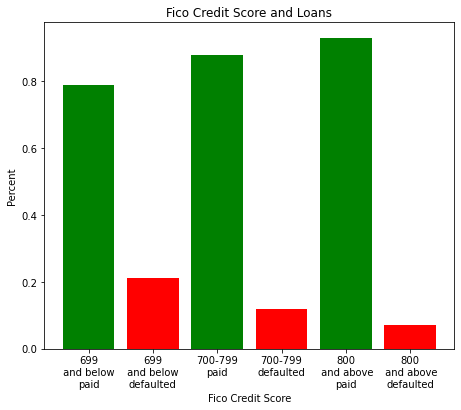

In [113]:
import matplotlib.pyplot as plt

names = ['699\n and below \npaid','699\n and below \ndefaulted',
         '700-799\npaid','700-799\ndefaulted',
         '800\n and above\npaid','800\n and above\ndefaulted']
values = [perc_f699[0],perc_f699[1],perc_f799[0],perc_f799[1],perc_f899[0],perc_f899[1]]
colors = ['green','red','green','red','green','red']
plt.figure(figsize=(25, 6))

plt.subplot(131)
plt.bar(names, values, color= colors)
plt.ylabel('Percent')
plt.xlabel('Fico Credit Score')
plt.title('Fico Credit Score and Loans')

plt.show()

In [88]:
# Printing the descriptions of the columns we are aggregating to data exploration purposes.
print('dti:',loan_schemaDF.loc['dti','description'])
print('not_fully_paid:',loan_schemaDF.loc['not_fully_paid','description'])

dtibins=[0,10,20,30]
grp_by_debt = loanDF.groupby([pd.cut(loanDF.dti, dtibins)])
debt_nfp =grp_by_debt['not_fully_paid'].value_counts()

dti_10 = round(debt_nfp[1]/(debt_nfp[0]+debt_nfp[1]),2)
dti_20 = round(debt_nfp[3]/(debt_nfp[2]+debt_nfp[3]),2)
dti_30 = round(debt_nfp[5]/(debt_nfp[4]+debt_nfp[5]),2)
print('\nPercentage of not paid loans')
print('debt to income  0-10:',dti_10 ,'\ndebt to income 10-20:',dti_20,'\ndebt to income 20-30:',dti_30)

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
not_fully_paid: If the loan was fully paid back 0 is yes, 1 is no

Percentage of not paid loans
debt to income  0-10: 0.15 
debt to income 10-20: 0.16 
debt to income 20-30: 0.18


In [89]:
dti_10

0.15

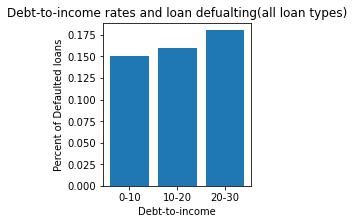

In [90]:
import matplotlib.pyplot as plt

names = ['0-10',
         '10-20',
         '20-30']
values = [dti_10,dti_20,dti_30]

plt.figure(figsize=(9,3))

plt.subplot(131)
plt.bar(names, values)
plt.ylabel('Percent of Defaulted loans')
plt.xlabel('Debt-to-income')
plt.title('Debt-to-income rates and loan defualting(all loan types)')
plt.show()

In [91]:
# Printing the descriptions of the columns we are aggregating to data exploration purposes.
print('Annual_inc:',loan_schemaDF.loc['annual_inc','description'])
print('not_fully_paid:',loan_schemaDF.loc['not_fully_paid','description'])
# looking at the if a specific purpose is more likely or less likely to pay or not pay.

incbins=[0,50000,100000,200000,2100000]
grp_by_inc = loanDF.groupby([pd.cut(loanDF.annual_inc, incbins)])
inc_nfp =grp_by_inc['not_fully_paid'].value_counts(normalize=True)

print('\nAnnual income by bins\n',inc_nfp)

Annual_inc: The self-reported annual income of the borrower.
not_fully_paid: If the loan was fully paid back 0 is yes, 1 is no

Annual income by bins
 annual_inc         not_fully_paid
(0, 50000]         0                 0.825581
                   1                 0.174419
(50000, 100000]    0                 0.852206
                   1                 0.147794
(100000, 200000]   0                 0.857511
                   1                 0.142489
(200000, 2100000]  0                 0.785366
                   1                 0.214634
Name: not_fully_paid, dtype: float64


In [92]:
inc_nfp[0]

0.8255813953488372

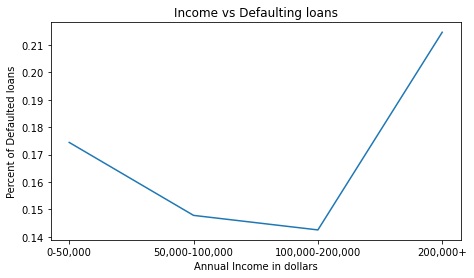

In [93]:
names = ['0-50,000', '50,000-100,000', '100,000-200,000','200,000+']
values = [inc_nfp[1],inc_nfp[3],inc_nfp[5],inc_nfp[7]]
plt.figure(figsize=(25,4))

plt.subplot(131)
plt.plot(names, values)
plt.ylabel('Percent of Defaulted loans')
plt.xlabel('Annual Income in dollars')
plt.title('Income vs Defaulting loans')
plt.show()

In [94]:
#filtered by income greater thatn 200000
annual_inc_large = loanDF['annual_inc']>200000
#grouped by purpose
annual_inc_large_grp = loanDF[annual_inc_large].groupby('purpose')
#viewed not fully paid
annual_inc_large_grp['not_fully_paid'].value_counts(normalize=True)

purpose             not_fully_paid
all_other           0                 0.800000
                    1                 0.200000
credit_card         0                 0.875000
                    1                 0.125000
debt_consolidation  0                 0.818182
                    1                 0.181818
home_improvement    0                 0.757576
                    1                 0.242424
major_purchase      0                 0.923077
                    1                 0.076923
small_business      0                 0.560000
                    1                 0.440000
Name: not_fully_paid, dtype: float64

In [95]:
# Printing the descriptions of the columns we are aggregating to data exploration purposes.
print('Annual_inc:',loan_schemaDF.loc['annual_inc','description'])
print('purpose:',loan_schemaDF.loc['not_fully_paid','description'])
print('not_fully_paid:',loan_schemaDF.loc['not_fully_paid','description'])
# looking at the if a specific purpose is more likely or less likely to pay or not pay.

#Selecting only small business loans
sb= loanDF.loc[loanDF['purpose'] == 'small_business']

# selecting the income ranges
incbins=[0,50000,100000,200000,2100000]
# Grouping the small buisiness loans by income
sb_grp_by_inc = sb.groupby([pd.cut(sb.annual_inc, incbins)])
# Creating a % of paid vs not paid 
sb_inc_nfp =sb_grp_by_inc['not_fully_paid'].value_counts(normalize=True)

print('\nAnnual income by bins\n',sb_inc_nfp)

Annual_inc: The self-reported annual income of the borrower.
purpose: If the loan was fully paid back 0 is yes, 1 is no
not_fully_paid: If the loan was fully paid back 0 is yes, 1 is no

Annual income by bins
 annual_inc         not_fully_paid
(0, 50000]         0                 0.739362
                   1                 0.260638
(50000, 100000]    0                 0.722222
                   1                 0.277778
(100000, 200000]   0                 0.728814
                   1                 0.271186
(200000, 2100000]  0                 0.560000
                   1                 0.440000
Name: not_fully_paid, dtype: float64


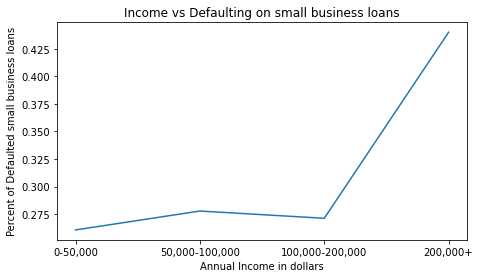

In [96]:
names = ['0-50,000', '50,000-100,000', '100,000-200,000','200,000+']
values = [sb_inc_nfp[1],sb_inc_nfp[3],sb_inc_nfp[5],sb_inc_nfp[7]]
plt.figure(figsize=(25,4))

plt.subplot(131)
plt.plot(names, values)
plt.ylabel('Percent of Defaulted small business loans')
plt.xlabel('Annual Income in dollars')
plt.title('Income vs Defaulting on small business loans')
plt.show()

In [97]:
# Printing the descriptions of the columns we are aggregating to data exploration purposes.
print('dti:',loan_schemaDF.loc['dti','description'])
print('not_fully_paid:',loan_schemaDF.loc['not_fully_paid','description'])
print('purpose:',loan_schemaDF.loc['not_fully_paid','description'])

dtibins=[0,10,20,30]
sb_grp_by_debt = sb.groupby([pd.cut(sb.dti, dtibins)])
sb_debt_nfp =sb_grp_by_debt['not_fully_paid'].value_counts()

sb_dti_10 = round(sb_debt_nfp[1]/(sb_debt_nfp[0]+sb_debt_nfp[1]),2)
sb_dti_20 = round(sb_debt_nfp[3]/(sb_debt_nfp[2]+sb_debt_nfp[3]),2)
sb_dti_30 = round(sb_debt_nfp[5]/(sb_debt_nfp[4]+sb_debt_nfp[5]),2)
print('\nPercentage of not paid small business loans')
print('debt to income  0-10:',sb_dti_10 ,'\ndebt to income 10-20:',sb_dti_20,'\ndebt to income 20-30:',sb_dti_30)

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
not_fully_paid: If the loan was fully paid back 0 is yes, 1 is no
purpose: If the loan was fully paid back 0 is yes, 1 is no

Percentage of not paid small business loans
debt to income  0-10: 0.23 
debt to income 10-20: 0.3 
debt to income 20-30: 0.36


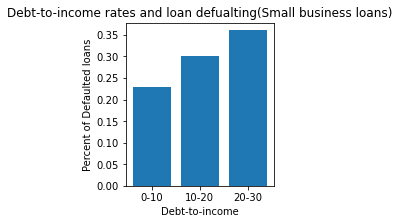

In [98]:
import matplotlib.pyplot as plt

names = ['0-10',
         '10-20',
         '20-30']
values = [sb_dti_10,sb_dti_20,sb_dti_30]

plt.figure(figsize=(9,3))

plt.subplot(131)
plt.bar(names, values)
plt.ylabel('Percent of Defaulted loans')
plt.xlabel('Debt-to-income')
plt.title('Debt-to-income rates and loan defualting(Small business loans)')
plt.show()

In [99]:
#Finding and printing the range of Fico
print('Range of fico is:',loanDF['fico'].min(),'to',loanDF['fico'].max())

#filtering fico into below 699, 700-799, and above 800. 
sb_fico_699 = sb.loc[(pd.to_numeric(sb['fico'],errors='coerce')) < 700]
# used to test the range of the filtered variable
print('Range of fico_699 is:' ,sb_fico_699['fico'].min(),'to',sb_fico_699['fico'].max())

sb_fico_799 = sb.loc[(pd.to_numeric(sb['fico'],errors='coerce')) <800]
sb_fico_799 = sb_fico_799.loc[(pd.to_numeric(sb['fico'],errors='coerce')) >=700]
# used to test the range of the filtered variable
print('Range of fico_799 is:',sb_fico_799['fico'].min(),'to',sb_fico_799['fico'].max())

sb_fico_899 = sb.loc[(pd.to_numeric(sb['fico'],errors='coerce')) >=800 ]
# used to test the range of the filtered variable
print('Range of fico_899 is:',sb_fico_899['fico'].min(),'to',sb_fico_899['fico'].max())

print('fico_699:',len(sb_fico_699),'\nfico_799:',len(sb_fico_799)
      ,'\nfico_899:',len(sb_fico_899))

Range of fico is: 612 to 827
Range of fico_699 is: 642 to 697
Range of fico_799 is: 702 to 797
Range of fico_899 is: 802 to 822
fico_699: 206 
fico_799: 400 
fico_899: 13


In [100]:
# Printing the descriptions of the columns we are aggregating to data 
#exploration purposes.
print('fico:',loan_schemaDF.loc['annual_inc','description'])
print('not_fully_paid:',loan_schemaDF.loc['not_fully_paid','description'])

sb_payment_fico_699_grp = sb_fico_699.groupby('not_fully_paid')
print('\nPercentage of Paid vs Not paid with a fico score of 699 and below:')
sb_f699 = []
for item in sb_payment_fico_699_grp['fico'].count():
    sb_f699.append(item)
sb_f699_sum = sum(sb_f699)
sb_perc_f699=[]
for item in sb_f699:
    b699=round(item/sb_f699_sum,2)
    print(b699)
    sb_perc_f699.append(b699)
   
sb_payment_fico_799_grp = sb_fico_799.groupby('not_fully_paid')
print('\nPercentage of Paid vs Not Paid with a fico score of 700-799:')
sb_f799 = []
for item in sb_payment_fico_799_grp['fico'].count():
    sb_f799.append(item)
sb_f799_sum = sum(sb_f799)
sb_perc_f799=[]
for item in sb_f799:
    b799=round(item/sb_f799_sum,2)
    print(b799)
    sb_perc_f799.append(b799)
    
sb_payment_fico_899_grp = sb_fico_899.groupby('not_fully_paid')
print('\nPercentage of Paid vs Not Paid with a fico score of 800 and above:')
sb_f899 = []
for item in sb_payment_fico_899_grp['fico'].count():
    sb_f899.append(item)
sb_f899_sum = sum(sb_f899)
sb_perc_f899=[]
for item in sb_f899:
    b899=round(item/sb_f899_sum,2)
    print(b899)
    sb_perc_f899.append(b899)

fico: The self-reported annual income of the borrower.
not_fully_paid: If the loan was fully paid back 0 is yes, 1 is no

Percentage of Paid vs Not paid with a fico score of 699 and below:
0.62
0.38

Percentage of Paid vs Not Paid with a fico score of 700-799:
0.77
0.23

Percentage of Paid vs Not Paid with a fico score of 800 and above:
0.92
0.08


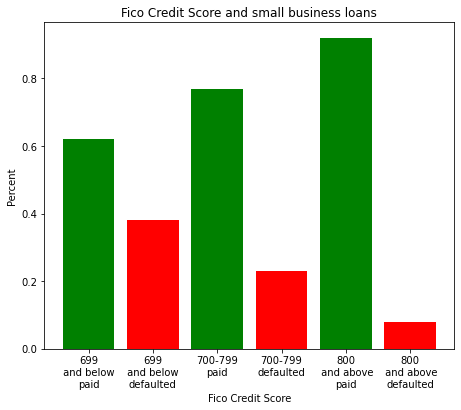

In [114]:
import matplotlib.pyplot as plt

names = ['699\n and below \npaid','699\n and below \ndefaulted',
         '700-799\npaid','700-799\ndefaulted',
         '800\n and above\npaid','800\n and above\ndefaulted']
values = [sb_perc_f699[0],sb_perc_f699[1],sb_perc_f799[0],sb_perc_f799[1],sb_perc_f899[0],
          sb_perc_f899[1]]
colors = ['green','red','green','red','green','red']
plt.figure(figsize=(25, 6))

plt.subplot(131)
plt.bar(names, values, color= colors)
plt.ylabel('Percent')
plt.xlabel('Fico Credit Score')
plt.title('Fico Credit Score and small business loans')

plt.show()

In [102]:
# replacing the strings with numeric values for machine learning
loanDF['purpose'] = loanDF['purpose'].replace(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'],[1,2,3,4,5,6,7])

# removing the created annual_inc so machine learing only uses the log.
loanDF = loanDF.drop("annual_inc", axis='columns')

In [103]:
# Printing the descriptions
print('not_fully_paid:',loan_schemaDF.loc['not_fully_paid','description'])
#showing % of loans paid vs not paid
round(loanDF['not_fully_paid'].value_counts(normalize=True),2)

not_fully_paid: If the loan was fully paid back 0 is yes, 1 is no


0    0.84
1    0.16
Name: not_fully_paid, dtype: float64

In [104]:
# Creating a function that will print out Accuracy, Precision and Recall from a confusion Matrix
def score(cm):
    tp = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tn = cm[1,1]
    total = tp+fp+fn+tn
    p = round(tp/(tp+fp),2)
    r = round(tp/(tp+fn),2)
    a = round((tp+tn)/total,2)
    print('Accuracy:',a,'\nPrecision:',p,'\nRecall:',r)
#Precision - What proportion of positive identifications was actually correct?
#Recall - What proportion of actual positives was identified correctly?

In [105]:
from sklearn.model_selection import train_test_split
# creating a dataframe (X) without the column we are attempting to predict.
X = loanDF.drop(columns=['not_fully_paid'])
# creating a dataframe (y) that is what we are attempting to predict
y = loanDF['not_fully_paid']
# spltting the dataframes into 80% train 20% test for evaluation later.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [119]:
## Decision Tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#selecting the machine learning algorighm into a variable
dt_model = DecisionTreeClassifier()
# Training the model on the 80% selected for training
dt_model.fit(X_train,y_train)
# using the model to predict the remaining 20%.
dt_predictions = dt_model.predict(X_test)

#Creating a confusion matrix of the models predictions and the actual results.
dt_cMatrix = confusion_matrix(y_test, dt_predictions)

#finding the Accuracy, Precision and Recall of the model.
score(dt_cMatrix)


Accuracy: 0.74 
Precision: 0.83 
Recall: 0.86


In [107]:
## Random Forest
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#selecting the machine learning algorighm into a variable
# also selecting for 1000 decision trees to be used.
rf_model = RandomForestClassifier(n_estimators=1000)
# Training the model on the 80% selected for training
rf_model.fit(X_train,y_train)
# using the model to predict the remaining 20%.
rf_predictions = rf_model.predict(X_test)

#Creating a confusion matrix of the models predictions and the actual results.
rf_cMatrix = confusion_matrix(y_test, rf_predictions)

#finding the Accuracy, Precision and Recall of the model.
score(rf_cMatrix)


Accuracy: 0.85 
Precision: 0.99 
Recall: 0.85


In [108]:
#Naive Bayes
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV, cross_validate 
from sklearn.metrics import accuracy_score
import numpy as np

#selecting the machine learning algorighm into a variable
nb_model = GaussianNB()

#creating a range for the variance smoothing to run through.
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
#Updating the model to incorporate the variance smoothing check.
nb_model_gs = GridSearchCV(estimator=nb_model, 
                 param_grid=params_NB, 
                 verbose=1, 
                 scoring='accuracy')

# Training the model on the 80% selected for training
nb_model_gs.fit(X_train,y_train)
#selecting the model of variance smoothing by highest variance
nb_model_gs.best_params_
# using the model to predict the remaining 20%.
nb_predictions = nb_model_gs.predict(X_test)

#Creating a confusion matrix of the models predictions and the actual results.
nb_cMatrix = confusion_matrix(y_test, nb_predictions)

#finding the Accuracy, Precision and Recall of the model.
score(nb_cMatrix)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy: 0.84 
Precision: 0.99 
Recall: 0.85


In [120]:
# SVM
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

#selecting the machine learning algorighm into a variable
svm_model = SVC()
# Training the model on the 80% selected for training
svm_model.fit(X_train,y_train)
# using the model to predict the remaining 20%.
svm_predictions = svm_model.predict(X_test)

#Creating a confusion matrix of the models predictions and the actual results.
svm_cMatrix = confusion_matrix(y_test, svm_predictions)

#finding the Accuracy, Precision and Recall of the model.
score(svm_cMatrix)

Accuracy: 0.85 
Precision: 1.0 
Recall: 0.85


In [110]:
#Creating an empty list to add dictionaries into
mla=[]
# creating dictionaries of the results with the type of machine learning used 
#adding the dictionaries into the empty list
mla.append({'type':'decision_tree','Accuracy': 0.73,'Precision': 0.82,'Recall': 0.85})
mla.append({'type':'Random_forest','Accuracy': 0.84,'Precision': 1.0,'Recall': 0.84})
mla.append({'type':'Naive_Bayes','Accuracy': 0.84,'Precision': 1.0,'Recall': 0.84})
mla.append({'type':'Support_Vector_Machine','Accuracy': 0.84,'Precision': 1.0 ,'Recall': 0.84})

#creating a dataframe using the list of dictionaries
mla_DF = pd.DataFrame(mla)

#setting the index to machine learning type name.
mla_DF.set_index('type',inplace=True)
# displaying the dataframe
mla_DF

,Accuracy,Precision,Recall
type,,,
decision_tree,0.73,0.82,0.85
Random_forest,0.84,1.00,0.84
Naive_Bayes,0.84,1.00,0.84
Support_Vector_Machine,0.84,1.00,0.84


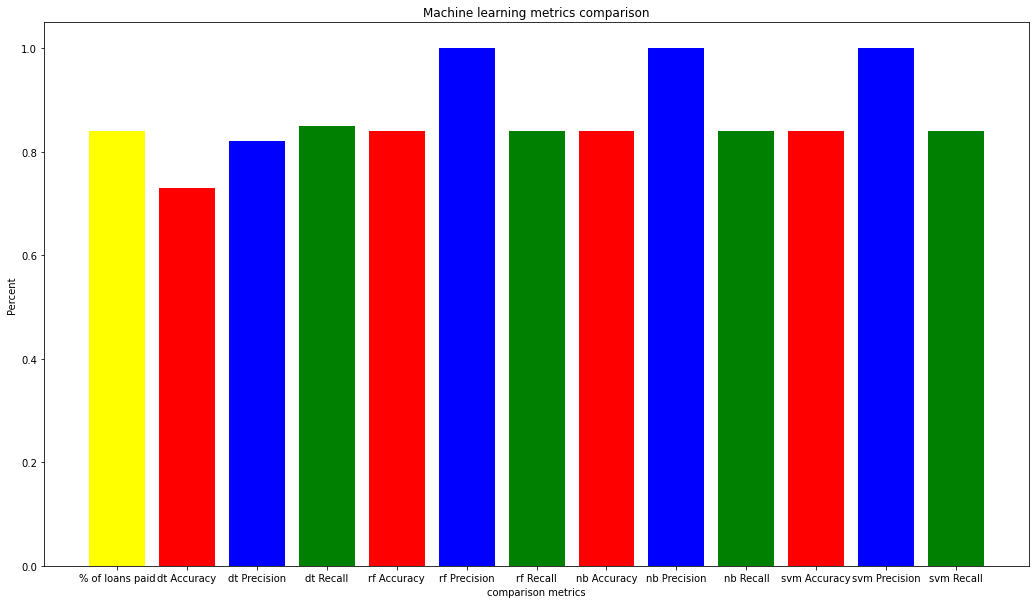

In [111]:
import matplotlib.pyplot as plt

paid=0.84
not_paid=0.16

names = ['% of loans paid','dt Accuracy','dt Precision', 'dt Recall',
         'rf Accuracy','rf Precision', 'rf Recall',
         'nb Accuracy','nb Precision', 'nb Recall',
         'svm Accuracy','svm Precision', 'svm Recall']  
values = [paid,mla_DF['Accuracy'][0],mla_DF['Precision'][0],mla_DF['Recall'][0],
         mla_DF['Accuracy'][1],mla_DF['Precision'][1],mla_DF['Recall'][1],
         mla_DF['Accuracy'][2],mla_DF['Precision'][2],mla_DF['Recall'][2],
         mla_DF['Accuracy'][3],mla_DF['Precision'][3],mla_DF['Recall'][3],]
colors2 = ['yellow','red','blue','green',
          'red','blue','green',
          'red','blue','green',
          'red','blue','green']
plt.figure(figsize=(60, 10))

plt.subplot(131)
plt.bar(names, values, color= colors2)
plt.ylabel('Percent')
plt.xlabel('comparison metrics')
plt.title('Machine learning metrics comparison')

plt.show()